In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1
##### Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

In [47]:
n = 5 # количество вопросов
p = 1/4 # вероятность правильно ответить на 1 вопрос
kr = np.arange(6) # количество правильных ответов от 1 до 5

In [2]:
def combinations(k: int, n: int):
    '''число сочетаний'''
    
    factorial = np.math.factorial
    result = factorial(n) // (factorial(k) * factorial(n - k))
    
    return result

In [17]:
def Bernoulli(k:int, n:int, p:float):
    '''распределения случайных величин'''
    
    return combinations(k,n)*(p**k)*((1-p)**(n-k))

In [48]:
result = [Bernoulli(k, n, p) for k in kr]
result

[0.2373046875,
 0.3955078125,
 0.263671875,
 0.087890625,
 0.0146484375,
 0.0009765625]

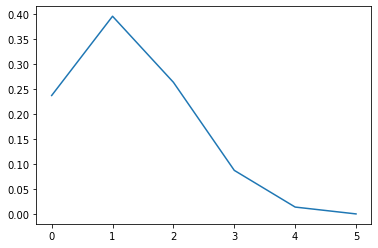

In [49]:
plt.plot(result)
plt.show()

In [50]:
Mx = n*p
Dx = Mx*(1-p)
Mx, Dx

(1.25, 0.9375)

### Задача 2

##### Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

$
P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}\\
\
\lambda = 10\\
$

$
P(X = k) = \dfrac{10^k e^{-10}}{k!} <= 0,95\\
$

In [15]:
def Poisson(lambda_:int, k:int):
    '''распределение событий за единицу времени'''
    
    return ((lambda_**k)*np.exp(-lambda_))/np.math.factorial(k)

In [21]:
N = 0
for n in range(10,20):
    result = sum(Poisson(10,k) for k in range(n))
    if result < 0.95:
        N = n, round(result,2)
f'Число N, при котором с вероятностью в 0.95 пользователь получит не более N писем со спамом за текущий день = {N[0]}'

'Число N, при котором с вероятностью в 0.95 пользователь получит не более N писем со спамом за текущий день = 15'

### Задача 3

##### Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

##### Подсказка. 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

$
p=0.01\\
P(X=k)=C_n^kp^k(1-p)^{n-k}
$

In [25]:
Bernoulli(6,200,0.01)

0.011727364580325954